I will crop all of the pooled image and the supervising data to match the reconstructed data

In [86]:
import sys
import numpy as np
import chainer
import chainer.functions as F
from chainer import cuda, Function, FunctionSet, gradient_check, Variable, optimizers
from matplotlib import pyplot as plt
from PIL import Image
import cPickle as pickle
cuda.init()
%matplotlib inline

In [88]:
slice_index = 2
patchsize_for_rcstr_data = 15
crop_cornerX = patchsize_for_rcstr_data/2
crop_cornerY = patchsize_for_rcstr_data/2
crop_range = (crop_cornerX, crop_cornerY, 256-crop_cornerX-1,  256-crop_cornerX-1)

pathraw = "/home/koyama-m/Research/membrane_CNN/data/preprocessed/training/pooled_training_dataset/"
filename_original = "pooled_image_%03d.tif" %2 
filename_to_save = "pooled_image_%03d_%scropped.tif" %(1, patchsize_for_rcstr_data)

original_image  = Image.open(pathraw + filename_original) 

rawfile = original_image.crop(crop_range)

Checking if the file cropped correctly


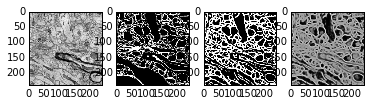

In [89]:
parentpath = parentpath= '/home/koyama-m/Research/membrane_CNN/'
crop15init_image_path = "reconstructed_256images_crop%s/" %patchsize_for_rcstr_data  
label_data_dir  = 'raw/train-labels'

original_label_filename = 'edgemap%03d.tif' %slice_index
reconstr_label_filename = 'multi_crop_prediction_binary_image_256_%03d.tif'% slice_index
reconstr_prob_filename = 'multi_crop_prediction_image_256_%03d.tif'% slice_index


real_label_original = Image.open("%s/data/%s/%s" % (parentpath, label_data_dir, original_label_filename ))
reconstr_label_original= Image.open("%sdata/%s/%s" % (parentpath, crop15init_image_path, reconstr_label_filename))
reconstr_prob_original= Image.open("%sdata/%s/%s" % (parentpath, crop15init_image_path, reconstr_prob_filename))



real_label = real_label_original.crop(crop_range)
reconstr_label = reconstr_label_original
reconstr_prob = reconstr_prob_original

plt.subplot(2,4,1)
plt.imshow(rawfile, cmap = plt.cm.gray)
plt.subplot(2,4,2)
plt.imshow(real_label, cmap = plt.cm.gray)
plt.subplot(2,4,3)
plt.imshow(reconstr_label, cmap = plt.cm.gray)
plt.subplot(2,4,4)
plt.imshow(reconstr_prob, cmap = plt.cm.gray)


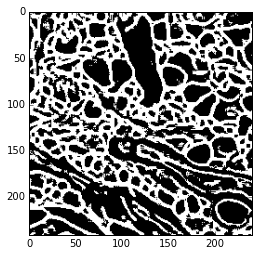

In [90]:
plt.imshow(reconstr_label, cmap = plt.cm.gray)


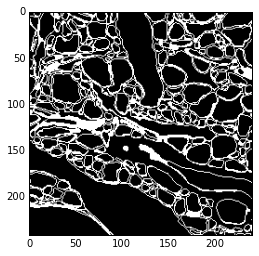

In [91]:
plt.imshow(real_label, cmap = plt.cm.gray)


In [92]:
real_label_array = np.array(list(real_label.getdata())).reshape(256-patchsize_for_rcstr_data,256-patchsize_for_rcstr_data)/255.
recontsr_label_array = np.array(list(reconstr_label.getdata())).reshape(256-patchsize_for_rcstr_data,256-patchsize_for_rcstr_data)/255.

delta = real_label_array - recontsr_label_array
delta

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ..., -1., -1., -1.],
       [ 0.,  0., -1., ...,  0., -1., -1.],
       [-1., -1., -1., ...,  1., -1., -1.]])

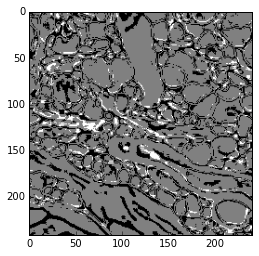

In [80]:
plt.imshow(delta, cmap = plt.cm.gray)

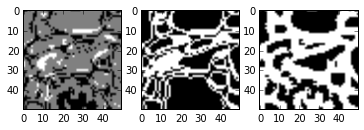

In [85]:
corner_x = 34
corner_y = 12
patchsize = 50
yrange = np.array(range(corner_y, corner_y + patchsize))
xrange = np.array(range(corner_x, corner_x + patchsize))
delta_little_patch = delta[:, yrange][xrange, :]
plt.subplot(1,3,1)
plt.imshow(delta_little_patch, cmap = plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(real_label_array[:, yrange][xrange, :], cmap = plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(recontsr_label_array[:, yrange][xrange, :], cmap = plt.cm.gray)


In [109]:
from scipy import misc
save_files_path ="/home/koyama-m/Research/membrane_CNN/data/preprocessed/training_laplace/"
delta_filename ='deltamap%03d_margin%s.tif'%(slice_index, patchsize_for_rcstr_data)
misc.imsave(save_files_path + delta_filename , delta)

In [110]:
save_files_path + delta_filename

'/home/koyama-m/Research/membrane_CNN/data/preprocessed/training_laplace/deltamap002_margin15.tif'

In [119]:
laplacepath = "/home/koyama-m/Research/membrane_CNN/data/preprocessed/training_laplace/"
filepath = "deltamap001_margin15.tif"
trial_image = Image.open(laplacepath + filepath) 
trial_delta_array = np.array(list(trial_image.getdata())).reshape(256-patchsize_for_rcstr_data,256-patchsize_for_rcstr_data)
trial_delta_array

array([[  0,   0,   0, ..., 127, 127,   0],
       [  0,   0,   0, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ..., 
       [127, 127, 127, ...,   0, 127, 127],
       [127,   0,   0, ...,   0, 127, 127],
       [127,   0, 127, ...,   0,   0, 127]])

In [120]:
trial_delta_array.tolist()

[[0,
  0,
  0,
  0,
  0,
  127,
  0,
  0,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  0,
  127,
  127,
  127,
  127,
  0,
  127,
  0,
  0,
  127,
  127,
  127,
  127,
  255,
  127,
  127,
  127,
  0,
  127,
  127,
  0,
  127,
  127,
  127,
  127,
  127,
  127,
  0,
  0,
  0,
  127,
  127,
  127,
  127,
  255,
  127,
  127,
  255,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  0,
  0,
  0,
  127,
  0,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  0,
  127,
  127,
  0,
  127,
  127,
  127,
  127,
  0,
  127,
  127,
  127,
  127,
  255,
  0,
  127,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  0,
  0,
  0,
  0,
  0,
  127,
  0,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  127,
  0,
  127,
  0,
  255,
  127,
  127,
  0,
  127,
  127,
  0,
  12